In [ ]:
import numpy as np
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features = 4,n_classes=2)
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

#Standardisation

In [ ]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])


In [ ]:
class LogidticRegression:
  def sigmoid(self,z):
        sig = 1/(1+e**(-z))
        return sig
  def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
  def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
  def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):

            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

standardize(X_tr)
standardize(X_te)
obj1 = LogidticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)

In [ ]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

#Let's see the f1-score for training and testing data
f1_score_tr = f1_score(y_tr,y_train)
f1_score_te = f1_score(y_te,y_pred)
print(f1_score_tr)
print(f1_score_te)

0.8043478260869565
0.8571428571428571


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression().fit(X_tr,y_tr)
y_pred = model.predict(X_te)
print(f1_score(y_te,y_pred))

0.8571428571428571


#using scikit learn

In [ ]:
# scikit-learn logistic regression

from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target

[:, [1, 2, 3, 4]]

#split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Data standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#model fit

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
print(f1_score(y_test, y_pred))

NameError: ignored

C=1000.0,

# Decision region drawing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

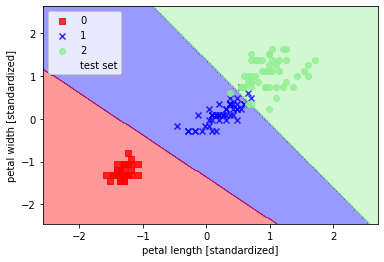

In [ ]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

# plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

#regularisation

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(0, 5):
   lr = LogisticRegression(C=10**c, random_state=0)
   lr.fit(X_train_std, y_train)
   weights.append(lr.coef_[1])
   params.append(10**c)

weights = np.array(weights)


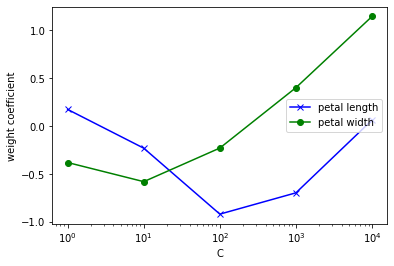

In [ ]:
# Decision region drawing
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], color='blue', marker='x', label='petal length')
plt.plot(params, weights[:, 1], color='green',  marker='o', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

#new code

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X /= X.max()

Computing regularization path ...
This took 0.073s


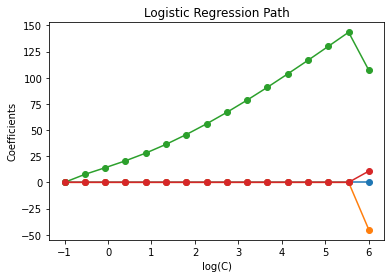

In [ ]:

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

#All type of regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

#Loading and cleaning the Data

In [ ]:

data = pd.read_csv('/content/weatherHistory.csv')


In [ ]:

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6216.0,6216.000000
mean,10.500130,9.284693,0.776707,9.984926,190.824835,9.566518,0.0,997.989355
std,10.519172,11.868025,0.173307,6.491972,106.467338,4.020271,0.0,142.656998
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.161111,-1.277778,0.670000,4.878300,126.000000,7.277200,0.0,1012.130000
50%,10.911111,10.911111,0.830000,9.080400,191.000000,9.982000,0.0,1016.770000
75%,18.833333,18.833333,0.920000,13.363000,287.000000,11.270000,0.0,1022.270000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


#Cleaning

Loud Cover has all the values zero so will be removing this feature!

In [ ]:
# Removing duplicates
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)

In [ ]:

(data.isnull().sum()/data.shape[0])*100

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.000000
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.016085
Pressure (millibars)        0.016085
Daily Summary               0.016085
dtype: float64

We have one column with missing values and the percentage of null values is also very less.



In [ ]:

data["Precip Type"]

0       rain
1       rain
2       rain
3       rain
4       rain
        ... 
6212    rain
6213    rain
6214    rain
6215    rain
6216    rain
Name: Precip Type, Length: 6217, dtype: object

This is a categorical variable. So will be looking at the diversity of the data and then will decide weather to include this in our model or not!

In [ ]:
(data["Precip Type"].value_counts()/data.shape[0])*100

rain    80.102944
snow    19.897056
Name: Precip Type, dtype: float64

The value in the column is not evenly divided but for now we will be keeping this variable. Creating a seperate category for null values.

In [ ]:
data["Precip Type"] = data["Precip Type"].fillna("None")

In [ ]:
# Double checking the values
data["Precip Type"].value_counts()

rain    4980
snow    1237
Name: Precip Type, dtype: int64

Catgorical Features

First, identifying the categorical columns. Looking at the distribution of the data in respective categories and there percentage present!

In [ ]:
categorical_columns = ["Summary", "Precip Type", "Daily Summary"]

for column in categorical_columns:
    print()
    print(column, len(data[column].unique()))
    print((data[column].value_counts()/data.shape[0])*100)


Summary 14
Partly Cloudy               30.368345
Mostly Cloudy               25.188998
Overcast                    20.154415
Clear                       13.800869
Foggy                        9.264919
Breezy and Overcast          0.402123
Breezy and Mostly Cloudy     0.321699
Breezy and Partly Cloudy     0.112594
Breezy and Foggy             0.112594
Humid and Mostly Cloudy      0.096510
Windy and Overcast           0.064340
Humid and Partly Cloudy      0.048255
Windy and Foggy              0.032170
Windy and Partly Cloudy      0.032170
Name: Summary, dtype: float64

Precip Type 2
rain    80.102944
snow    19.897056
Name: Precip Type, dtype: float64

Daily Summary 59
Mostly cloudy throughout the day.                                                                                   10.825157
Partly cloudy until night.                                                                                           8.106804
Partly cloudy throughout the day.                                      

Looking at the data, will be droping "Daily Summary" feature, "Loud Cover" with all values as 0 and "Formatted Date" feature as well.

In [ ]:
# Dropping unnecessary columns at once
data.drop(columns = ["Loud Cover", "Daily Summary" , "Formatted Date"], inplace=True)

# Updating categorical column list
categorical_columns = ["Summary", "Precip Type"]

Numerical features

First step, is to look at the corelation of dependent variables with the independant variable!

In [ ]:
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.993012,-0.570716,-0.052443,0.046769,0.433691,-0.076084
Apparent Temperature (C),0.993012,1.000000,-0.541660,-0.123874,0.057446,0.425633,-0.073232
Humidity,-0.570716,-0.541660,1.000000,-0.208689,0.042648,-0.334127,0.058710
Wind Speed (km/h),-0.052443,-0.123874,-0.208689,1.000000,-0.064030,0.072123,-0.043019
Wind Bearing (degrees),0.046769,0.057446,0.042648,-0.064030,1.000000,0.018894,-0.050882
Visibility (km),0.433691,0.425633,-0.334127,0.072123,0.018894,1.000000,-0.034917
Pressure (millibars),-0.076084,-0.073232,0.058710,-0.043019,-0.050882,-0.034917,1.000000


Humidity and Visibility is closely related to Temperature
Apparent Temperature and Temperature are very strongly related
We will be predicting "Apparent Temperature".Thus, will be dropping Temperature feature

In [ ]:
# List of numeric columns
numerical_columns = ["Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Visibility (km)", "Pressure (millibars)"]

# Dropping
data.drop(columns=["Temperature (C)"], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   6217 non-null   object 
 1   Precip Type               6217 non-null   object 
 2   Apparent Temperature (C)  6217 non-null   float64
 3   Humidity                  6217 non-null   float64
 4   Wind Speed (km/h)         6217 non-null   float64
 5   Wind Bearing (degrees)    6217 non-null   float64
 6   Visibility (km)           6217 non-null   float64
 7   Pressure (millibars)      6216 non-null   float64
dtypes: float64(6), object(2)
memory usage: 388.7+ KB


Visualization

We will be using some graph to get a sense and distribution of data!

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
# Taking a sample dataset of 20% if the dataset for visulization for faster computation
sample_df = data.sample(frac=0.2, replace=True, random_state=7)

# Resetting Index
sample_df.reset_index(drop=True, inplace=True)

In [ ]:
sample_df.shape

(1243, 8)

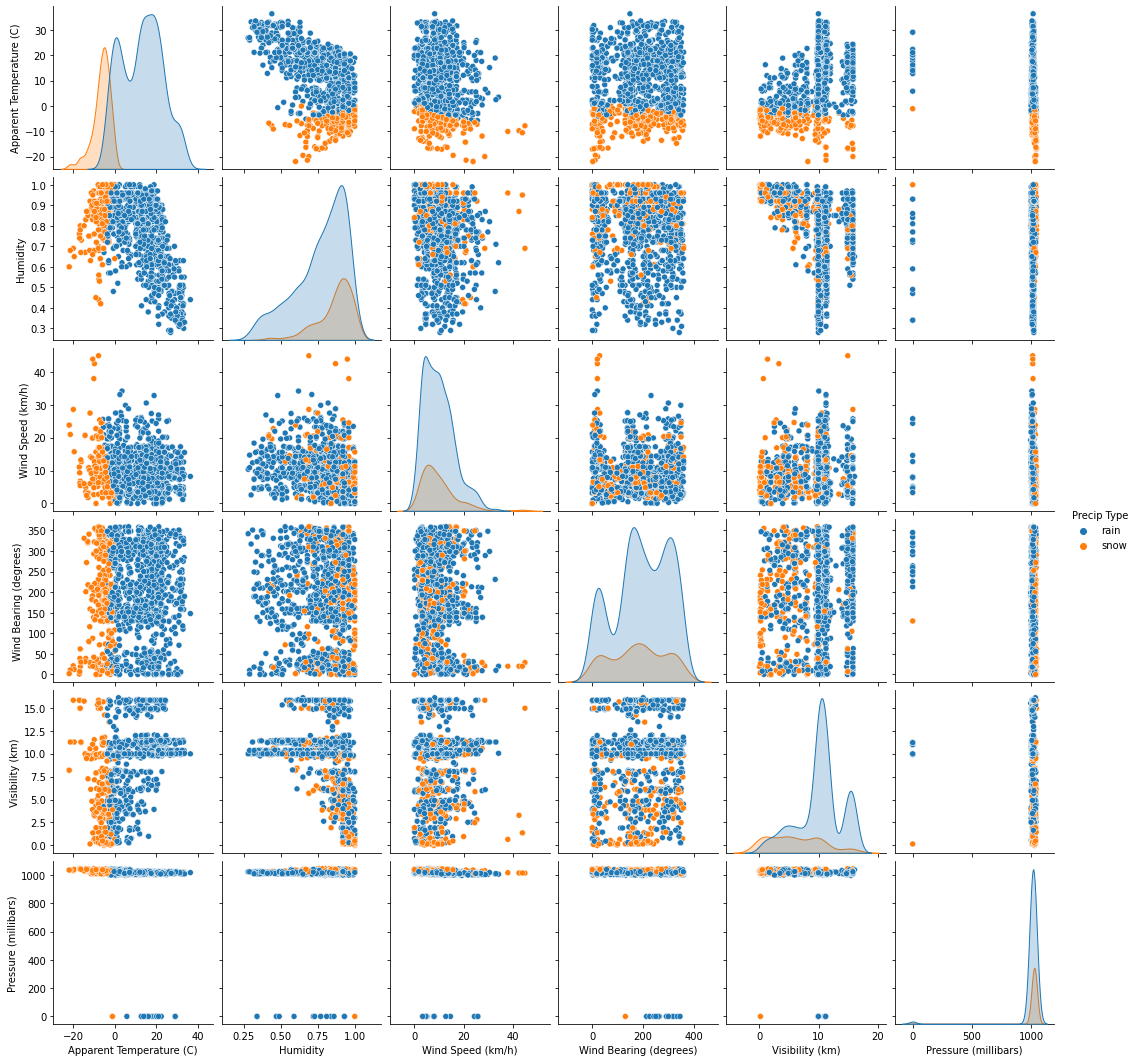

In [ ]:
# Using "Precip Type" to analysing patterns
sns.pairplot(data=sample_df, hue="Precip Type")

Data validates that:

Snow- low temperature
Rain- on higher side
Density:

Apparent Temperature - slighly left skewed
Humidity - left skewed
Wind Speed - right skewed
Wind Bearing - Balanced
Visibility - slighlty left skewed
Pressure - highly left skewed

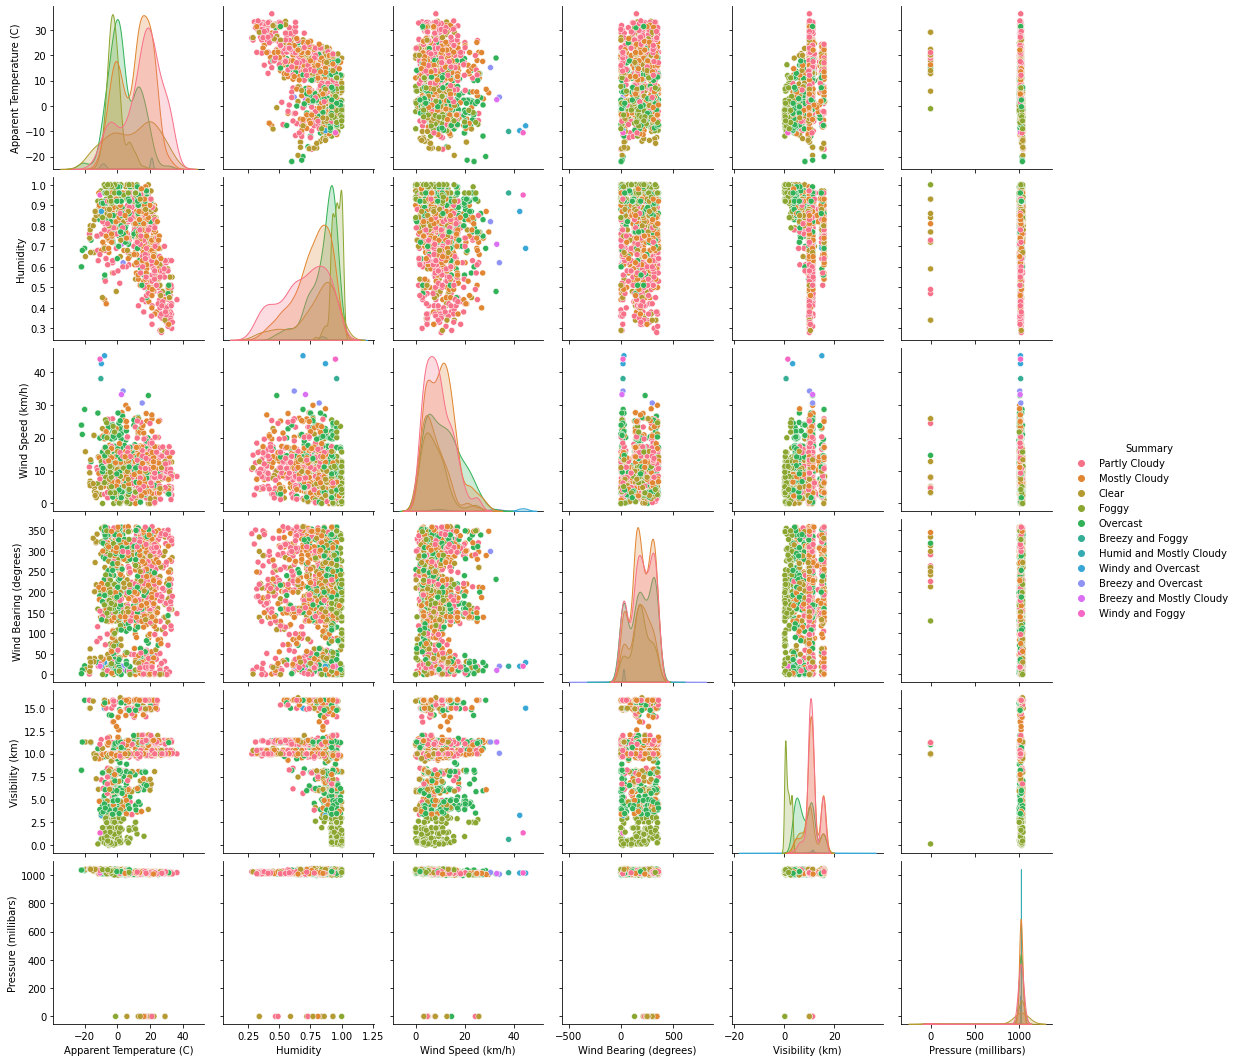

In [ ]:
# Using "Summary" to analysing patterns
sns.pairplot(data=sample_df, hue="Summary")

APPARENT TEMPERATURE vs HUMIDITY, Corelation:-0.632331

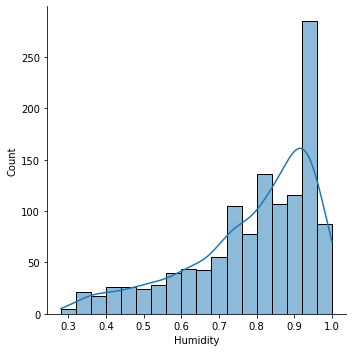

In [ ]:
# Distribution plot
sns.displot(sample_df, x="Humidity", kde=True)

Baseline model
with Linear Regression, Polynomial Regression and XGB Regressor!

Dependent Variables:

Humidity
Visibility (km)
Scalling / Normalizing Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

# Scalling dependent variable
dependent_scaler = MinMaxScaler()
X_scaled = dependent_scaler.fit_transform(df[["Humidity", "Visibility (km)"]].values)

# Scalling independent variable
independent_scaler = MinMaxScaler()
y_scaled = independent_scaler.fit_transform(df[["Apparent Temperature (C)"]].values)

del dependent_scaler, independent_scaler

# Taking quick glance at the transformed data
display(pd.DataFrame(X_scaled, columns=["Humidity", "Visibility (km)"]).describe())
display(pd.DataFrame(y_scaled, columns=["Apparent Temperature (C)"]).describe())

KeyError: ignored

For probplot,will be using the whole dataset as in a particular sample the total count of outliers will be reduced as compaird to whole dataset!

In [ ]:
print(data.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    1
Humidity                    1
Wind Speed (km/h)           1
Wind Bearing (degrees)      1
Visibility (km)             1
Loud Cover                  1
Pressure (millibars)        1
Daily Summary               1
dtype: int64


#Building and evaluating the different models
a) Linear Regression:

In [ ]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.7023918054017277


#Ridge(L2) Regression:

In [ ]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 69.0894970827666
0.5 : 69.0896736853784
0.75 : 69.08983055353472
1.0 : 69.08996788999437
1.25 : 69.09008589519246
1.5 : 69.090184767271
1.75 : 69.09026470210985
2.0 : 69.0903258933561


From the above output, we can conclude that the best value of alpha for the data is 2.


In [ ]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)

# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.7021298474855231


# Lasso(L1) Regression:

In [ ]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []

# List to maintain the different values of Lambda
Lambda = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 69.08930606738559
0.5 : 69.08931157130694
0.75 : 69.08931704585156
1.0 : 69.08932249597729
1.25 : 69.0893279184286
1.5 : 69.08933331350488
1.75 : 69.08933868275066
2.0 : 69.08934402400371


From the above output, we can conclude that the best value of lambda is 2.

In [ ]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.7023825761860318


# Comparing and Visualizing the results

In [ ]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]

# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = linearModel.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)

# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regression : 0.7023918054017277
Ridge Regression : 0.7021298474855231
Lasso Regression : 0.7023825761860318


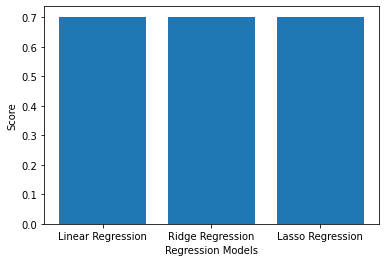

In [ ]:

# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()